```
Diogo Tuler Chaves
Izadora Ganem
Thiago Assis
Rafael Gomes
Laila Melo
```

<font size = 20> <font color = blue> **Consultas Trabalho final IBD**


# **Instalando o necessário para rodar**
*Ideal ser rodado no ambiente do Google Colab*

In [ ]:
import sys
!{sys.executable} -m pip install sqlite3
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install csv
!{sys.executable} -m pip install gdown
!{sys.executable} -m pip install google.colab
!{sys.executable} -m pip install time
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib.pyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found 

# **Importando o necessário para rodar**

In [ ]:
import sqlite3 as sql3
import pandas as pd
import csv
from google.colab import files
import gdown
import numpy as np
import matplotlib.pyplot as plt
import time

# **Instalando o esquema em sql**

In [ ]:
!gdown "1uqwPQNMEyZUtlOMHX0oOEyuGVYd7RkSn"

Downloading...
From: https://drive.google.com/uc?id=1uqwPQNMEyZUtlOMHX0oOEyuGVYd7RkSn
To: /content/Campeonato_Brasileiro.sql
100% 174k/174k [00:00<00:00, 98.0MB/s]


# **Abrindo o esquema**

In [ ]:
con = sql3.connect(":memory:")
sql_file = open('Campeonato_Brasileiro.sql', encoding="utf8")
db = sql_file.read()
cur = con.cursor()
cur.executescript(db)
con.commit()

# **Mostrando as Tabelas**

**CAMPEONATO**

In [ ]:
query = "PRAGMA table_info('campeonato')"
df = pd.read_sql(query, con)
display(df)

,cid,name,type,notnull,dflt_value,pk
0,0,data_inicio,DATE,1,None,0
1,1,data_fim,DATE,1,None,0
2,2,codigo_campeonato,INTEGER,1,None,1


**TIME**

In [ ]:
query = "PRAGMA table_info('clube')"
df = pd.read_sql(query, con)
display(df)

,cid,name,type,notnull,dflt_value,pk
0,0,codigo_time,INTEGER,1,None,1
1,1,nome,VARCHAR(100),1,None,0
2,2,estado,CHAR(2),1,None,0


**JOGO**

In [ ]:
query = "PRAGMA table_info('jogo')"
df = pd.read_sql(query, con)
display(df)

,cid,name,type,notnull,dflt_value,pk
0,0,codigo_jogo,INTEGER,1,None,1
1,1,data_jogo,DATE,1,None,0
2,2,horario,TIME,1,None,0
3,3,estadio,VARCHAR(100),1,None,0
4,4,rodada,INT,1,None,0
5,5,codigo_mandante,INT,1,None,0
6,6,codigo_visitante,INT,1,None,0
7,7,gols_mandante,INT,1,None,0
8,8,gols_visitante,INT,1,None,0


**TRABALHADOR**

In [ ]:
query = "PRAGMA table_info('funcionario')"
df = pd.read_sql(query, con)
display(df)

,cid,name,type,notnull,dflt_value,pk
0,0,codigo_funcionario,BIGINT,1,None,1
1,1,codigo_time,INT,1,None,0
2,2,nome,VARCHAR(100),1,None,0
3,3,idade,INT,0,None,0
4,4,salario,DOUBLE,1,None,0
5,5,nacionalidade,VARCHAR(50),0,None,0
6,6,data_nascimento,DATE,1,None,0
7,7,altura,DOUBLE,0,None,0
8,8,peso,DOUBLE,0,None,0
9,9,posicao,VARCHAR(3),0,None,0


**JOGADOR**

In [ ]:
query = "PRAGMA table_info('jogador')"
df = pd.read_sql(query, con)
display(df)

,cid,name,type,notnull,dflt_value,pk


**TECNICO**

In [ ]:
query = "PRAGMA table_info('tecnico')"
df = pd.read_sql(query, con)
display(df)

,cid,name,type,notnull,dflt_value,pk


**PARTICIPAÇÃO_TIME_CAMPEONATO**

In [ ]:
query = "PRAGMA table_info('participacao_time_campeonato')"
df = pd.read_sql(query, con)
display(df)

,cid,name,type,notnull,dflt_value,pk
0,0,codigo_time,INT,1,None,1
1,1,codigo_campeonato,INT,1,None,2
2,2,pontos,INT,1,None,0
3,3,vitorias,INT,1,None,0
4,4,derrotas,INT,1,None,0
5,5,empates,INT,1,None,0
6,6,gols_pro,INT,1,None,0
7,7,gols_contra,INT,1,None,0
8,8,cartoes_amarelo,INT,0,None,0
9,9,cartoes_vermelho,INT,0,None,0


**PATROCINADOR**

In [ ]:
query = "PRAGMA table_info('patrocinador')"
df = pd.read_sql(query, con)
display(df)

,cid,name,type,notnull,dflt_value,pk
0,0,CNPJ,VARCHAR(11),1,None,1
1,1,nome,VARCHAR(50),1,None,0
2,2,codigo_time,INT,1,None,2
3,3,valor_patrocinio,DOUBLE,1,None,0
4,4,ano_inicio,YEAR,1,None,0
5,5,ano_fim,YEAR,1,None,0


# **Função para abrir o arquivo onde as tabelas com os reultados vão ser escritas**

In [ ]:
Resultado_txt = "Resultados.txt"
queries = open(Resultado_txt, 'w')
queries.write("Tabelas dos Resultados das Consultas\n\n")

38

#**Função para fazer as pesquisas e retornar as tabelas de resultado**
*Todas elas são salvas em um txt chamado "Resultados.txt"*




In [ ]:
def runQuery(query):
  df = pd.read_sql(query, con)
  query_size = df.shape
  df.insert(0,'',range(0, len(df)))
  queries.write("Consulta = \"" + str(query) + "\"\n" + "Tamanho = " + str(query_size) + "\n")
  queries.write(df.to_string(index=False))
  queries.write("\n\n")
  del df['']
  display(df)

#**Variáveis para retornar os tempos em ms**


In [ ]:
tempo1 = []
tempo2 = []
consulta = []

# **Consultas em si**

# Enunciado das 10 consultas:

- 2 apenas operações de seleção e projeção
- 3 junção de duas relações
- 3 junção de três ou mais relações
- 2 funções de agregação sobre o resultado da junção de pelo menos duas relações


Cada consulta especificada deverá ser formulada de pelo menos duas formas diferentes considerando,
por exemplo, opções como utilização ou não do operador JOIN, utilização ou não de consultas aninhadas, criação
de índices para determinadas colunas, inversão da ordem das relações na cláusula FROM, entre outras.

In [ ]:
#Consulta 1: Nome dos times que pertencem ao estado de 'AM' //projeção e seleção
consulta = consulta + [1]

inicio = time.time()
q = "SELECT nome FROM clube WHERE estado='AM'"
runQuery(q)
fim = time.time()
tempo1 = tempo1 + [abs((inicio - fim)*1000)]

inicio = time.time()
p = "SELECT nome FROM clube WHERE estado IN (SELECT estado FROM clube WHERE estado = 'AM')"
runQuery(p)
fim = time.time()
tempo2 = tempo2 + [abs((inicio - fim)*1000)]

,nome
0,Planalto Esporte Clube
1,Marieta Futebol Clube


,nome
0,Planalto Esporte Clube
1,Marieta Futebol Clube


In [ ]:
#Consulta 2: Nome e o salario dos funcionários que ganham mais de R$ 1.000.000,00 //projeção e seleção
consulta = consulta + [2]

inicio = time.time()
q = "SELECT nome, salario FROM funcionario WHERE salario>1000000"
runQuery(q)
fim = time.time()
tempo1 = tempo1 + [abs((inicio - fim)*1000)]

inicio = time.time()
p = "SELECT nome, salario FROM funcionario GROUP BY salario HAVING salario > 1000000"
runQuery(p)
fim = time.time()
tempo2 = tempo2 + [abs((inicio - fim)*1000)]

,nome,salario
0,Arthur Ferreira,2184391.0
1,Vicente da Costa,1197114.0
2,Paulo Cardoso,2307293.0
3,Nathan Novaes,2083311.0
4,Marcelo Araújo,1197148.0
...,...,...
384,Nicolas Porto,2137045.0
385,João Lucas Moraes,1558218.0
386,Luiz Fernando Monteiro,1872721.0
387,Otávio Aragão,2353627.0


,nome,salario
0,Pedro Lucas Costela,1000400.0
1,Daniel Castro,1008858.0
2,Luiz Gustavo Rodrigues,1011692.0
3,Enzo Carvalho,1025275.0
4,Davi Lucas da Costa,1025489.0
...,...,...
384,Emanuel da Mota,2469422.0
385,Davi Luiz Souza,2470382.0
386,Anthony Novaes,2490922.0
387,João Ramos,2497763.0


In [ ]:
#Consulta 3: Anos em que o time 'Vila Esporte Clube' ganhou campeonatos // junção de 2 relações
consulta = consulta + [3]

inicio = time.time()
q = "SELECT ano FROM titulo NATURAL JOIN clube WHERE nome = 'Vila Esporte Clube'"
runQuery(q)
fim = time.time()
tempo1 = tempo1 + [abs((inicio - fim)*1000)]

inicio = time.time()
p = "SELECT ano FROM titulo JOIN clube WHERE titulo.codigo_time = clube.codigo_time AND nome='Vila Esporte Clube'"
runQuery(p)
fim = time.time()
tempo2 = tempo2 + [abs((inicio - fim)*1000)]

,ano
0,2009
1,2019


,ano
0,2009
1,2019


In [ ]:
#Consulta 4: Listar em ordem crescente o cnpj dos patrocinadores do time 'Vila Esporte Clube' //junção 2 relações
consulta = consulta + [4]

inicio = time.time()
q = "SELECT CNPJ FROM clube JOIN patrocinador WHERE clube.codigo_time = patrocinador.codigo_time AND clube.nome = 'Vila Esporte Clube'"
runQuery(q)
fim = time.time()
tempo1 = tempo1 + [abs((inicio - fim)*1000)]

inicio = time.time()
p = "SELECT CNPJ FROM patrocinador WHERE codigo_time IN (SELECT codigo_time FROM clube WHERE nome = 'Vila Esporte Clube')"
runQuery(p)
fim = time.time()
tempo2 = tempo2 + [abs((inicio - fim)*1000)]

,CNPJ
0,1707094462
1,65889114819
2,79830239774


,CNPJ
0,1707094462
1,65889114819
2,79830239774


In [ ]:
#Constulta 5: Selecionar o nome e a quantidade de pontos dos times que participaram do campeonato//junção 2 relações
consulta = consulta + [5]

inicio = time.time()
q = "SELECT nome, pontos FROM clube NATURAL JOIN participacao_time_campeonato"
runQuery(q)
fim = time.time()
tempo1 = tempo1 + [abs((inicio - fim)*1000)]

inicio = time.time()
p = "SELECT clube.nome, participacao_time_campeonato.pontos FROM clube JOIN participacao_time_campeonato WHERE clube.codigo_time = participacao_time_campeonato.codigo_time"
runQuery(p)
fim = time.time()
tempo2 = tempo2 + [abs((inicio - fim)*1000)]

,nome,pontos
0,Sion Futebol Clube,66
1,Bonfim Esporte Clube,41
2,Santa Esporte Clube,57
3,Cônego Esporte Clube,46
4,Vila Futebol Clube,57
5,Marajó Esporte Clube,50
6,Planalto Esporte Clube,61
7,Marieta Futebol Clube,60
8,Vila Futebol Clube,56
9,Vila Esporte Clube,64


,nome,pontos
0,Sion Futebol Clube,66
1,Bonfim Esporte Clube,41
2,Santa Esporte Clube,57
3,Cônego Esporte Clube,46
4,Vila Futebol Clube,57
5,Marajó Esporte Clube,50
6,Planalto Esporte Clube,61
7,Marieta Futebol Clube,60
8,Vila Futebol Clube,56
9,Vila Esporte Clube,64


In [ ]:
#Consulta 6: Selecionar o codigo do campeonato e quantos cartões amarelos o time Sion Futebol Clube levou nele // junção de 3 relações
consulta = consulta + [6]

inicio = time.time()
q = "SELECT codigo_campeonato, cartoes_amarelo FROM clube NATURAL JOIN campeonato NATURAL JOIN participacao_time_campeonato WHERE clube.nome = 'Sion Futebol Clube'"
runQuery(q)
fim = time.time()
tempo1 = tempo1 + [abs((inicio - fim)*1000)]

inicio = time.time()
p = "SELECT codigo_campeonato, cartoes_amarelo FROM campeonato NATURAL JOIN participacao_time_campeonato WHERE codigo_time IN(SELECT codigo_time FROM clube NATURAL JOIN campeonato WHERE clube.nome = 'Sion Futebol Clube')"
runQuery(p)
fim = time.time()
tempo2 = tempo2 + [abs((inicio - fim)*1000)]

,codigo_campeonato,cartoes_amarelo
0,1,8


,codigo_campeonato,cartoes_amarelo
0,1,8


In [ ]:
#Consulta 7: nome dos tecnicos dos times que jogam no dia 08-08-2023 //junção de 3 relações
consulta = consulta + [9]

inicio = time.time()
q = "SELECT funcionario.nome FROM funcionario JOIN (SELECT codigo_time AS cod_time_jog FROM clube JOIN jogo ON clube.codigo_time=codigo_mandante OR clube.codigo_time=codigo_visitante WHERE data_jogo='2023-08-08') ON funcionario.codigo_time=cod_time_jog WHERE funcionario.posicao IS NULL"
runQuery(q)
fim = time.time()
tempo1 = tempo1 + [abs((inicio - fim)*1000)]

inicio = time.time()
p = "SELECT funcionario.nome FROM funcionario JOIN (SELECT clube.codigo_time AS cod_time_jog FROM clube JOIN jogo ON clube.codigo_time = jogo.codigo_mandante OR clube.codigo_time = jogo.codigo_visitante WHERE jogo.data_jogo = '2023-08-08') AS subquery ON funcionario.codigo_time = subquery.cod_time_jog WHERE funcionario.posicao IS NULL"
runQuery(p)
fim = time.time()
tempo2 = tempo2 + [abs((inicio - fim)*1000)]

,nome
0,Arthur Ferreira
1,Benício Rocha


,nome
0,Arthur Ferreira
1,Benício Rocha


In [ ]:
#Consulta 8: nome dos patrocinadores do time que ganh o campeonato de 2019
consulta = consulta + [10]

inicio = time.time()
q = "SELECT patrocinador.nome FROM patrocinador JOIN (SELECT clube.codigo_time AS cod_tim_ganhou FROM clube JOIN titulo ON clube.codigo_time=titulo.codigo_time WHERE titulo.ano='2019') ON patrocinador.codigo_time=cod_tim_ganhou"
runQuery(q)
fim = time.time()
tempo1 = tempo1 + [abs((inicio - fim)*1000)]

inicio = time.time()
p = "SELECT patrocinador.nome FROM patrocinador JOIN (SELECT clube.codigo_time AS cod_tim_ganhou FROM clube JOIN titulo WHERE titulo.ano='2019' AND  clube.codigo_time = titulo.codigo_time) ON patrocinador.codigo_time=cod_tim_ganhou"
runQuery(p)
fim = time.time()
tempo2 = tempo2 + [abs((inicio - fim)*1000)]

,nome
0,Casa de Apostas Facilis Ducimus


,nome
0,Casa de Apostas Facilis Ducimus


In [ ]:
#Consulta 9: Selecionar a media de idades dos jogadores dos times //agregação
consulta = consulta + [8]

inicio = time.time()
q = "SELECT clube.nome, AVG(idade) FROM clube JOIN funcionario ON clube.codigo_time = funcionario.codigo_time WHERE posicao IS NOT NULL GROUP BY clube.codigo_time"
runQuery(q)
fim = time.time()
tempo1 = tempo1 + [abs((inicio - fim)*1000)]

inicio = time.time()
p = "SELECT clube.nome, AVG(funcionario.idade) FROM clube JOIN funcionario ON clube.codigo_time = funcionario.codigo_time WHERE funcionario.posicao IS NOT NULL GROUP BY clube.codigo_time"
runQuery(p)
fim = time.time()
tempo2 = tempo2 + [abs((inicio - fim)*1000)]

,nome,AVG(idade)
0,Sion Futebol Clube,55.666667
1,Bonfim Esporte Clube,56.066667
2,Santa Esporte Clube,55.766667
3,Cônego Esporte Clube,59.733333
4,Vila Futebol Clube,59.266667
5,Marajó Esporte Clube,56.533333
6,Planalto Esporte Clube,62.033333
7,Marieta Futebol Clube,61.600000
8,Vila Futebol Clube,60.066667
9,Vila Esporte Clube,57.466667


,nome,AVG(funcionario.idade)
0,Sion Futebol Clube,55.666667
1,Bonfim Esporte Clube,56.066667
2,Santa Esporte Clube,55.766667
3,Cônego Esporte Clube,59.733333
4,Vila Futebol Clube,59.266667
5,Marajó Esporte Clube,56.533333
6,Planalto Esporte Clube,62.033333
7,Marieta Futebol Clube,61.600000
8,Vila Futebol Clube,60.066667
9,Vila Esporte Clube,57.466667


In [ ]:
#Consulta 10: Selecionar nome dos times e quantos patrocinadores eles possuem para times que tem mais de 2 patrocinadores //agregação
consulta = consulta + [7]

inicio = time.time()
q = "SELECT clube.nome, COUNT(*) AS numero_de_patrocinadores FROM clube JOIN patrocinador WHERE clube.codigo_time = patrocinador.codigo_time GROUP BY patrocinador.codigo_time HAVING COUNT() > 2"
runQuery(q)
fim = time.time()
tempo1 = tempo1 + [abs((inicio - fim)*1000)]

inicio = time.time()
p = "SELECT clube.nome, subquery.numero_de_patrocinadores FROM clube JOIN (SELECT codigo_time, COUNT(*) AS numero_de_patrocinadores FROM patrocinador GROUP BY codigo_time HAVING COUNT(*) > 2) AS subquery ON clube.codigo_time = subquery.codigo_time"
runQuery(p)
fim = time.time()
tempo2 = tempo2 + [abs((inicio - fim)*1000)]

,nome,numero_de_patrocinadores
0,Sion Futebol Clube,4
1,Bonfim Esporte Clube,4
2,Santa Esporte Clube,4
3,Cônego Esporte Clube,4
4,Vila Futebol Clube,4
5,Marajó Esporte Clube,3


,nome,numero_de_patrocinadores
0,Sion Futebol Clube,4
1,Bonfim Esporte Clube,4
2,Santa Esporte Clube,4
3,Cônego Esporte Clube,4
4,Vila Futebol Clube,4
5,Marajó Esporte Clube,3


[5.46717643737793, 19.906282424926758, 3.942728042602539, 4.819154739379883, 4.984617233276367, 4.534482955932617, 6.181240081787109, 5.409479141235352, 7.975578308105469, 5.667448043823242]


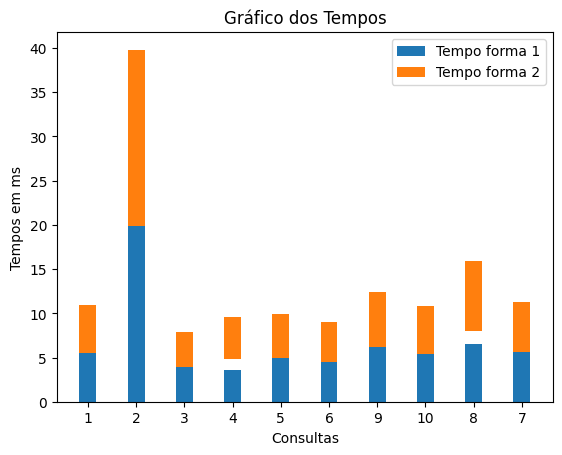

In [ ]:
posicao = np.arange(len(consulta))
plt.bar(posicao, tempo1, 0.35, label='Tempo forma 1')
plt.bar(posicao, tempo2, 0.35, bottom=tempo2, label='Tempo forma 2')

plt.xlabel('Consultas')
plt.ylabel('Tempos em ms')
plt.title('Gráfico dos Tempos')
plt.xticks(posicao, consulta)
plt.legend()
print(tempo2)
plt.show()

#**Fechar o sql**

In [ ]:
queries.close()
con.close()

# **No ambiente do Google Colab é necessário instalar o arquivo txt gerado**

In [ ]:
files.download(Resultado_txt)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>